In [11]:
import urllib.request
import json
import matplotlib.pyplot as plt

In [12]:
def get_data(region):
    url = f"https://idph.illinois.gov/DPHPublicInformation/api/COVIDExport/GetResurgenceDataHospitalAvailability?regionID={region}&daysIncluded=10"
    req = urllib.request.Request(url)
    with urllib.request.urlopen(req) as response:
        page = response.read()
    my_json = page.decode('utf8').replace("'", '"')
    data = json.loads(my_json)
    return data

def graph(regions):
    all_lst = []
    for region in regions:
        all_lst.append(get_data(region))
    for jsonl in all_lst:
        dates = []
        icu_per = []
        for inst in jsonl:
            region_name = inst["regionDescription"]
            dates.append(inst["reportDate"][:10])
            icu_per.append(inst["AverageICUAvailPct"])
        plt.plot(dates, icu_per, label=region_name)
    plt.xlabel('Dates', fontsize = 12)
    plt.ylabel('ICU Availability Percent', fontsize = 12)
    plt.xticks(rotation=90)
    plt.title('ICU Availability vs Time', fontsize = 20)
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.show()
    return
            

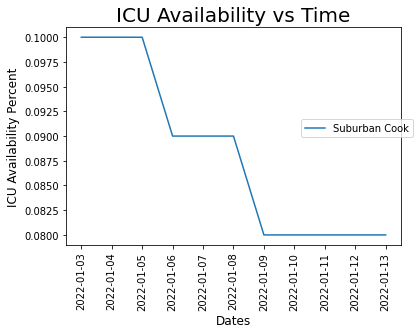

In [13]:
# Graph for Cook County
graph([10])

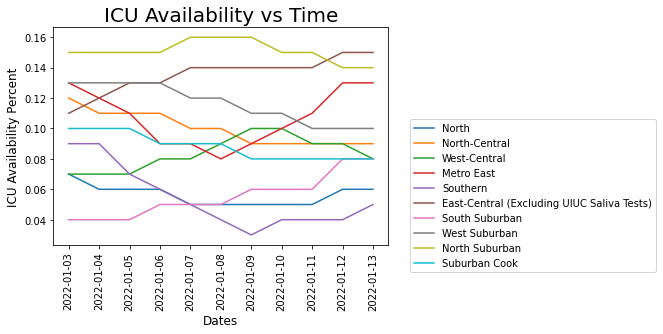

In [14]:
graph(list(range(1,11)))